Quant Error:	 0.011469528370384537 
Topo  Error:	 0.0047169811320754715 
Class Error:	 0.0 
Occupancy:	 0.0424 
      Iters:	 2
Class Error:	 0.0 91


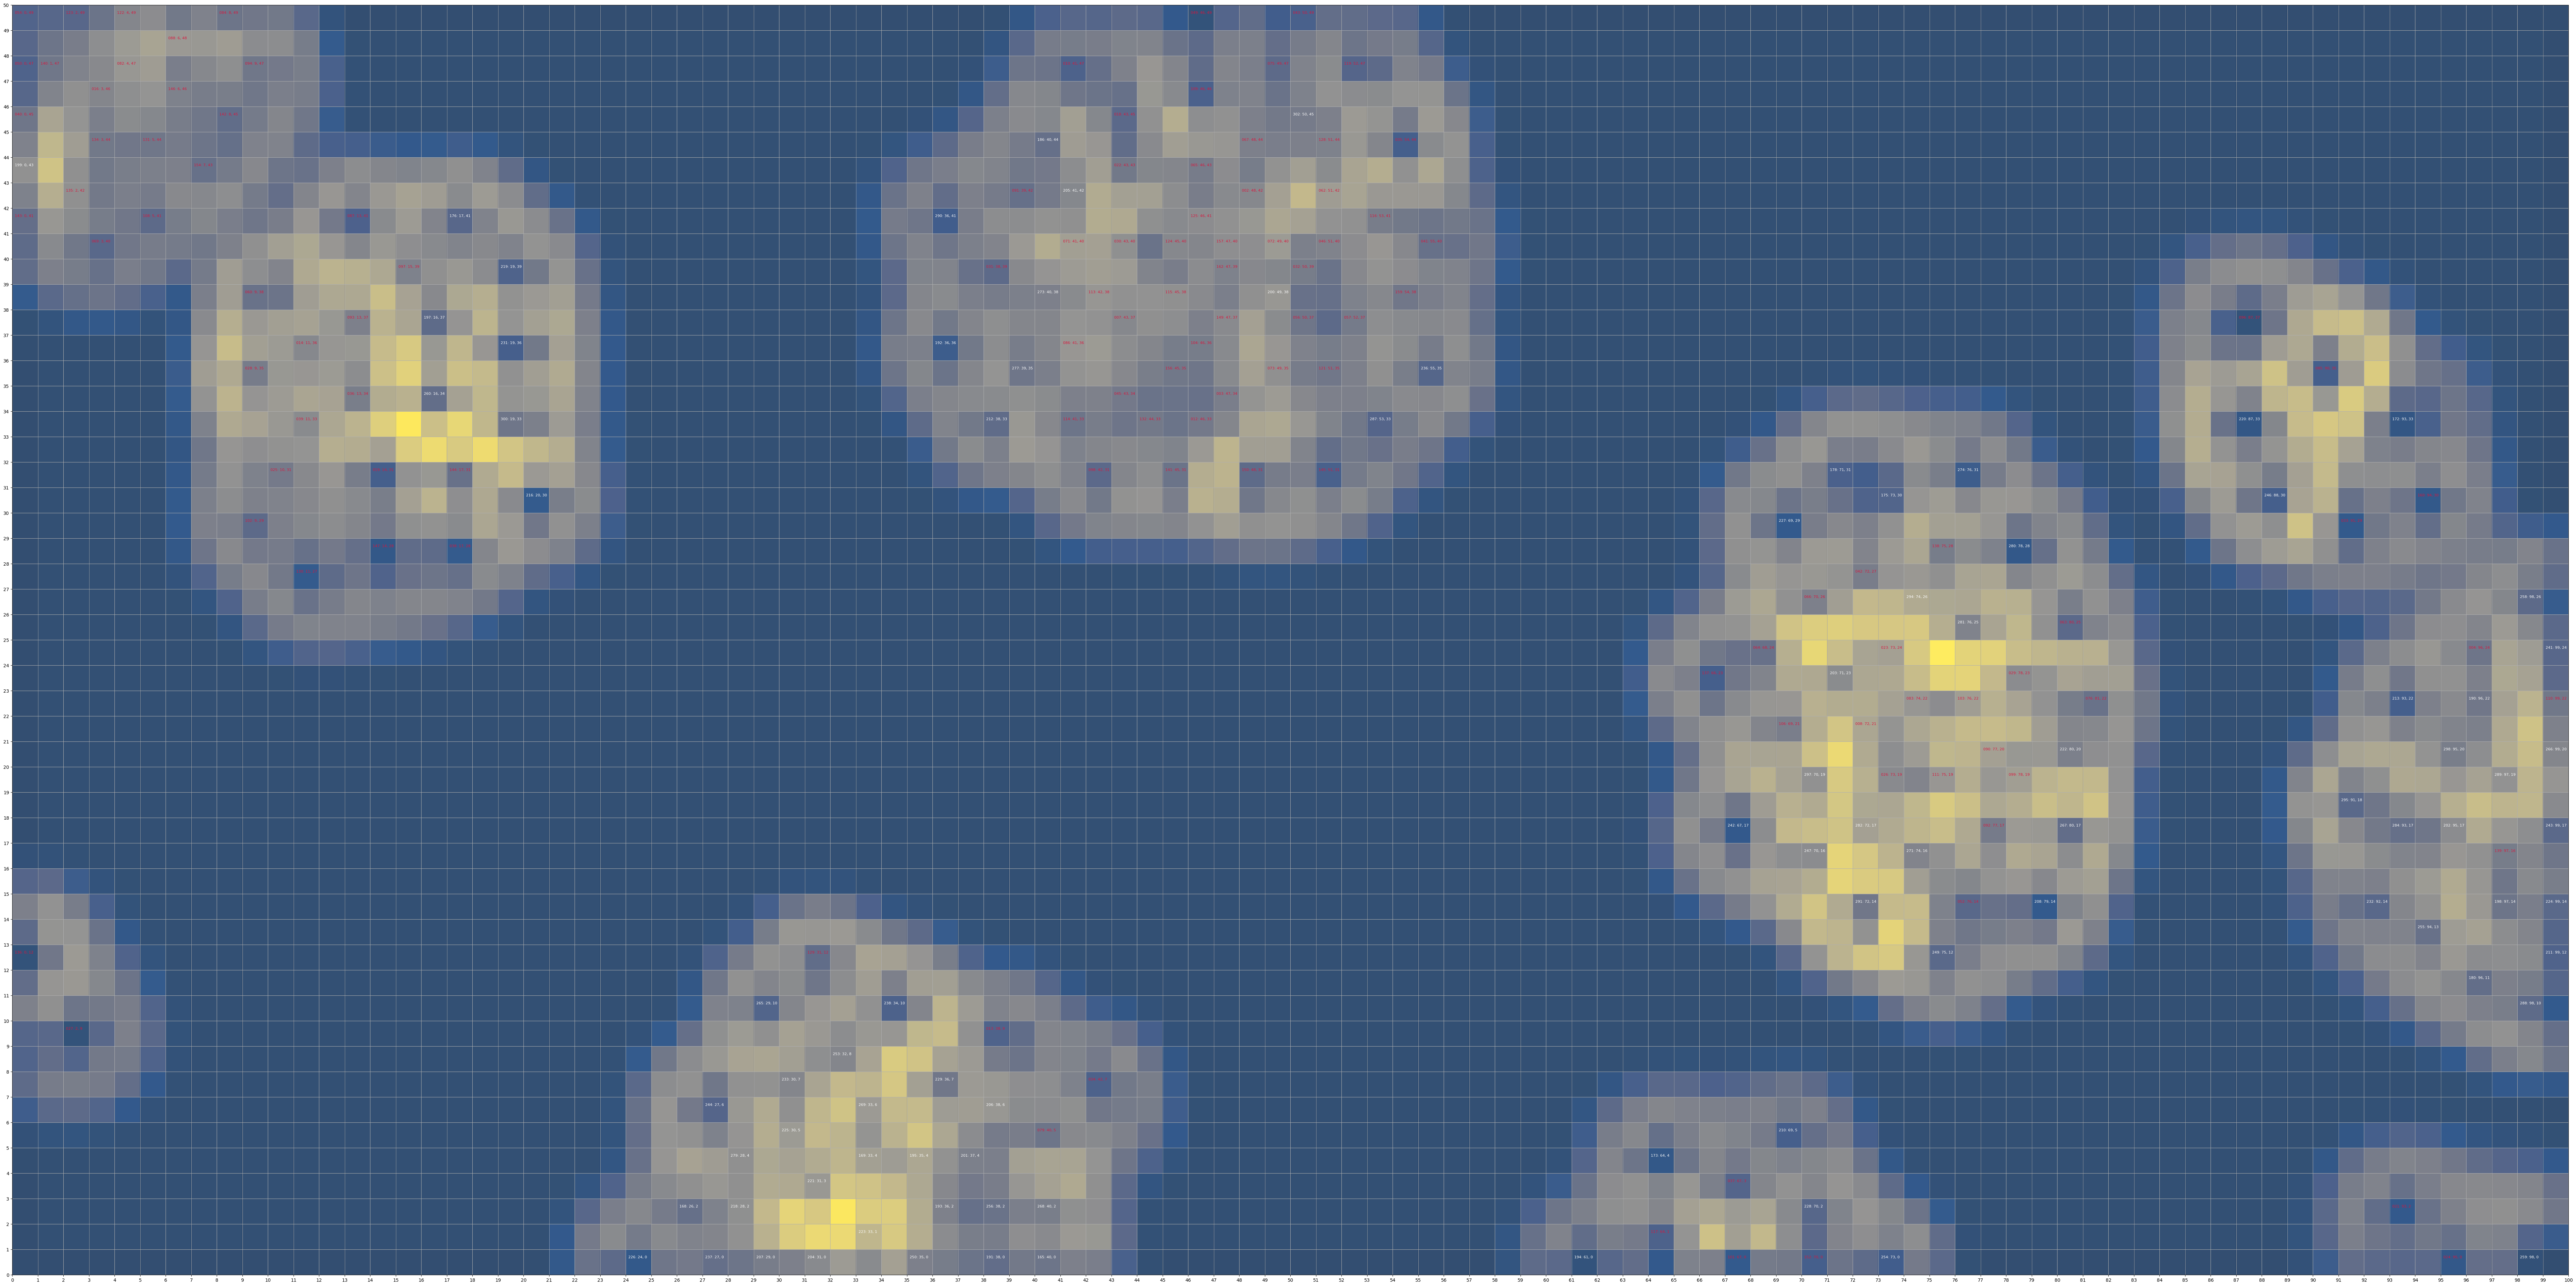

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from minisom import MiniSom

from pysomexplanations import Explainer, display_SOM, classify
from sklearn.model_selection import train_test_split

data_df = pd.read_csv('heart.csv')
explainable_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'thal']
unexplainable_features = ['restecg', 'oldpeak', 'slope', 'ca']
feature_cols = explainable_features + unexplainable_features
target_cols = ['target']
labels = ["{:03d}".format(i) for i in range(0, data_df.shape[0])]
data_df['labels'] = labels

train, test = train_test_split(data_df, test_size=0.3)

features = train[feature_cols]
target = train[target_cols]

ex = Explainer(features, feature_cols, list(train['target']), list(train['labels']), test)

metrics, som = ex.get_som(x_size=80, opt_threshold=0.05, opt_x_step=10)
#print((ex.x_size, ex.y_size), metrics)

display_SOM(som, ex)
print('Quant Error:\t', metrics['q_error'], '\nTopo  Error:\t', metrics['t_error'], 
      '\nClass Error:\t', metrics['c_error'], '\nOccupancy:\t', metrics['occupancy'], 
      '\n      Iters:\t', metrics['iters'])

raw_score = classify(som, np.array(test[feature_cols]), ex)
print('Class Error:\t', 1.0 - (sum(raw_score) / len(raw_score)), len(raw_score))

In [2]:
metrics

{'q_error': 0.011469528370384537,
 't_error': 0.0047169811320754715,
 'c_error': 0.0,
 'occupancy': 0.0424,
 'iters': 2,
 'history': ([0.0685398596660725, 0.011469528370384537],
  [0.0, 0.0047169811320754715],
  [0.05234567901234568, 0.0424],
  [0.0, 0.0])}